## 11. Sub-band 3D

### d

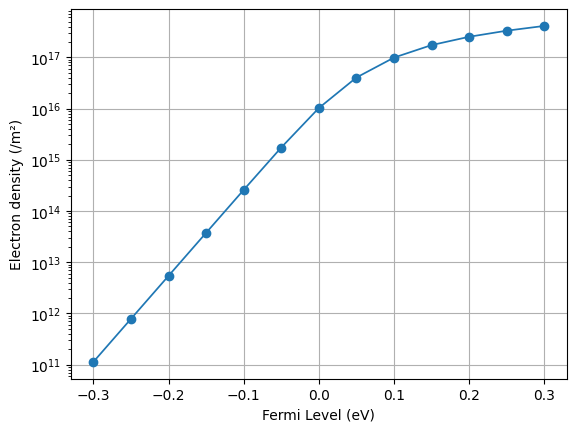

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602192e-19       # Elementary charge, C
h = 6.626176e-34       # Planck constant, J·s
hbar = h / (2 * np.pi) # Reduced Planck constant
m0 = 9.109543e-31      # Electron mass, kg
k_B = 1.380662e-23     # Boltzmann constant, J/K
T = 300                # Temperature, K

# Device parameters
Lx = 100e-9
Ly = 100e-9
Lz = 5e-9
nmax = 2

# Directional effective mass
mzz = 0.91 * m0
mxx = 0.19 * m0
myy = 0.19 * m0

# Fermi level scan
dEF = 0.05
EF_list = np.arange(-0.3, 0.3 + dEF, dEF)
elec = np.zeros((nmax, len(EF_list)))

# Electron calculation
for iEF, EF in enumerate(EF_list):
    for n in range(1, nmax + 1):
        Ezn = hbar**2 * n**2 * np.pi**2 / (2 * mzz * Lz**2)
        elec[n - 1, iEF] = (Lx * Ly / (2 * np.pi)) * (mxx / hbar**2) * k_B * T * np.log(1 + np.exp((-Ezn + EF * q) / (k_B * T)))

# Total electron density (cm^-2)
eDensity = 2 * np.sum(elec, axis=0) / (Lx * Ly)

# Plotting
plt.semilogy(EF_list, eDensity, '-o', linewidth=1.25)
plt.xlabel('Fermi Level (eV)')
plt.ylabel('Electron density (/m²)')
plt.grid(True)
plt.show()


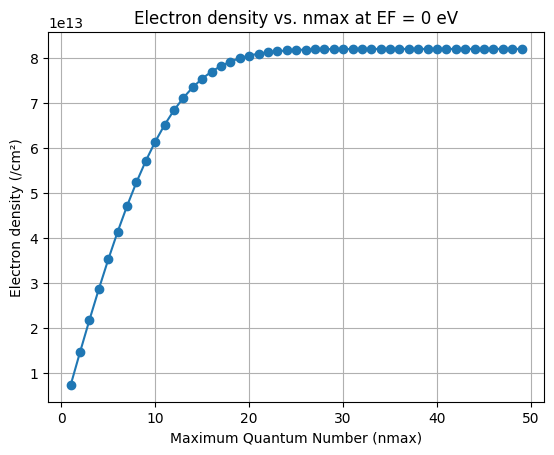

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602192e-19       # Elementary charge, C
h = 6.626176e-34       # Planck constant, J·s
hbar = h / (2 * np.pi) # Reduced Planck constant
m0 = 9.109543e-31      # Electron mass, kg
k_B = 1.380662e-23     # Boltzmann constant, J/K
T = 300                # Temperature, K

# Device parameters
Lx = 100e-9
Ly = 100e-9
Lz = 10e-9

# Directional effective mass
mzz = 20 * m0
mxx = 1 * m0

# Fermi level
EF = 0.0  # example fixed Fermi level (eV)

# Range of maximum quantum numbers
nmax_values = np.arange(1, 50)  # 1 to 10
eDensity_values = []

for nmax in nmax_values:
    elec = 0
    for n in range(1, nmax + 1):
        Ezn = hbar**2 * n**2 * np.pi**2 / (2 * mzz * Lz**2)
        elec += (Lx * Ly / (2 * np.pi)) * (mxx / hbar**2) * k_B * T * np.log(1 + np.exp((-Ezn + EF * q) / (k_B * T)))
    eDensity = 2 * elec / (Lx * Ly*1e4)  # cm^-2
    eDensity_values.append(eDensity)

# Plot
plt.plot(nmax_values, eDensity_values, '-o', linewidth=1.5)
plt.xlabel('Maximum Quantum Number (nmax)')
plt.ylabel('Electron density (/cm²)')
plt.title('Electron density vs. nmax at EF = 0 eV')
plt.grid(True)
plt.show()


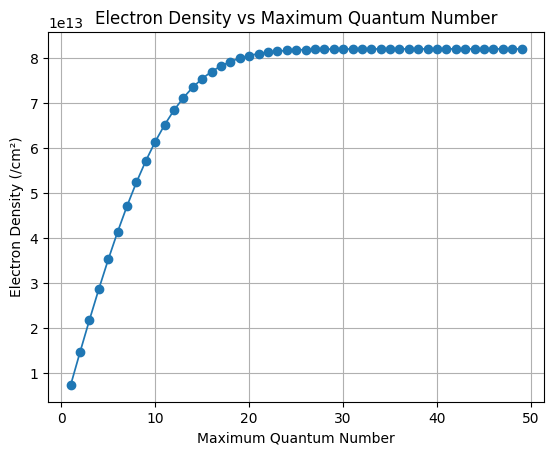

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602192e-19       # Elementary charge, C
h = 6.626176e-34       # Planck constant, J·s
hbar = h / (2 * np.pi) # Reduced Planck constant
m0 = 9.109543e-31      # Electron mass, kg
k_B = 1.380662e-23     # Boltzmann constant, J/K
T = 300                # Temperature, K

# Device parameters
Lx = 100e-9
Ly = 100e-9
Lz = 10e-9 #default=5e-9

# Directional effective mass
mzz = 20 * m0 # default=0.91
mxx = 1 * m0 #default=0.19
#myy = 0.19 * m0

# Maximum quantum number range
nmax_list = np.arange(1, 50, 1)  # 여러 최대 양자수 값을 고려

# Fermi level 설정
EF = 0.0  # eV #default=0

# Electron density 계산
eDensity_list = []
for nmax in nmax_list:
    elec = np.zeros(nmax)
    for n in range(1, nmax + 1):
        Ezn = hbar**2 * n**2 * np.pi**2 / (2 * mzz * Lz**2)
        elec[n - 1] = (Lx * Ly / (2 * np.pi)) * (mxx / hbar**2) * k_B * T * np.log(1 + np.exp((-Ezn + EF * q) / (k_B * T)))

    eDensity = 2 * np.sum(elec) / (Lx * Ly * 1e4)  # 전자 밀도 계산
    eDensity_list.append(eDensity)

# Plotting
plt.plot(nmax_list, eDensity_list, '-o', linewidth=1.25)
plt.xlabel('Maximum Quantum Number')
plt.ylabel('Electron Density (/cm²)')
plt.grid(True)
plt.title('Electron Density vs Maximum Quantum Number')
plt.show()


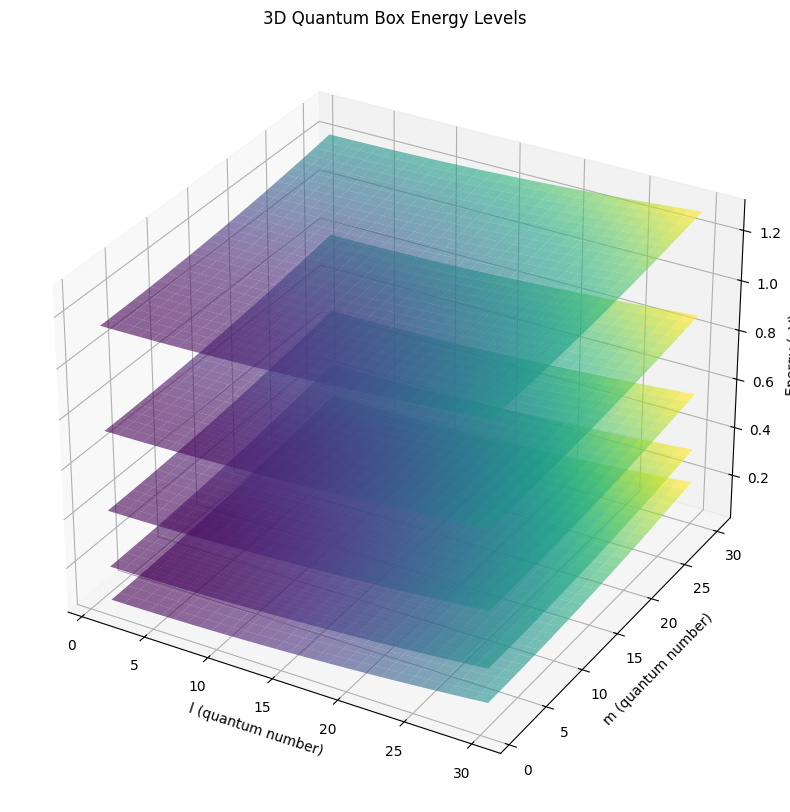

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0545718e-34  # Planck constant [J·s]
pi = np.pi
q = 1.602176634e-19   # Elementary charge [C]
m0 = 9.10938356e-31   # Electron mass [kg]

# Dimensions
Lx = 50e-9  # meters
Ly = 50e-9
Lz = 1e-9

# Effective masses (example values, adjust if needed)
mxx = 0.2 * m0
myy = 0.2 * m0
mzz = 0.9 * m0

lmax = 30
mmax = 30

# Meshgrid for plotting
l = np.arange(1, lmax+1)
m = np.arange(1, mmax+1)
L, M = np.meshgrid(l, m)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Loop over n
for n in range(1, 6):  # n = 1 to 5
    E = ((hbar * pi)**2) / (2 * m0) * (
        (1/mxx) * (L / Lx)**2 +
        (1/myy) * (M / Ly)**2 +
        (1/mzz) * (n / Lz)**2
    )
    E_eV = E / q  # Convert to electron volts (eV)
    
    ax.plot_surface(L, M, E_eV, cmap='viridis', alpha=0.6)
 

ax.set_xlabel("l (quantum number)")
ax.set_ylabel("m (quantum number)")
ax.set_zlabel("Energy (eV)")
ax.set_title("3D Quantum Box Energy Levels")
plt.show()


n = 1, Energy range: 460311504247862853826213052416.00 eV to 1944719786778535887222014476288.00 eV
n = 2, Energy range: 1836292485459090564748081627136.00 eV to 3320700767989763668512627228672.00 eV
n = 3, Energy range: 4129594120811137898974017486848.00 eV to 5614002403341811284213539799040.00 eV
n = 4, Energy range: 7340216410304002534335462768640.00 eV to 8824624692834675356625031659520.00 eV
n = 5, Energy range: 11468159353937689255907021553664.00 eV to 12952567636468362078196590444544.00 eV


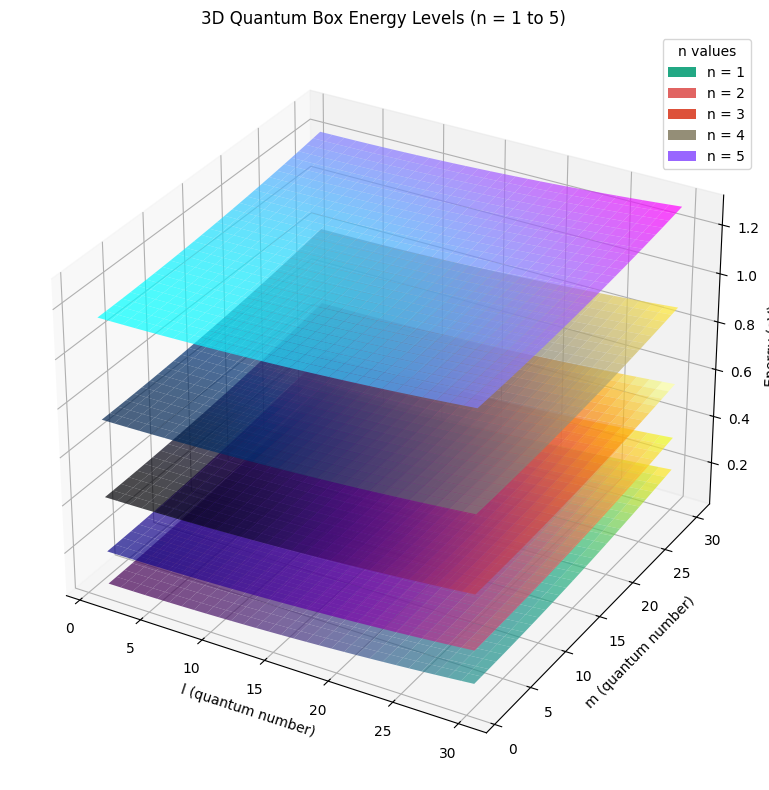

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch  # For custom legend

# Constants
hbar = 1.0545718e-34  # Planck constant [J·s]
pi = np.pi
q = 1.602176634e-19   # Elementary charge [C]
m0 = 9.10938356e-31   # Electron mass [kg]

# Box dimensions (meters)
Lx = 50e-9
Ly = 50e-9
Lz = 1e-9

# Effective masses
mxx = 0.2 * m0
myy = 0.2 * m0
mzz = 0.9 * m0

# Quantum numbers
lmax = 30
mmax = 30
l = np.arange(1, lmax + 1)
m = np.arange(1, mmax + 1)
L, M = np.meshgrid(l, m)

# Set up figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Color map list and legend proxies
colors = ['viridis', 'plasma', 'inferno', 'cividis', 'cool']
legend_elements = []

# Loop over n = 1 to 5
for idx, n in enumerate(range(1, 6)):
    E = ((hbar * pi)**2) / (2 * m0) * (
        (1/mxx) * (L / Lx)**2 +
        (1/myy) * (M / Ly)**2 +
        (1/mzz) * (n / Lz)**2
    )
    E_eV = E / q

    print(f"n = {n}, Energy range: {E_eV.min():.2f} eV to {E_eV.max():.2f} eV")

    surf = ax.plot_surface(L, M, E_eV, cmap=colors[idx % len(colors)], alpha=0.7)

    # Add to legend
    legend_elements.append(Patch(facecolor=plt.get_cmap(colors[idx % len(colors)])(0.6),
                                 label=f'n = {n}'))

# Axis labels
ax.set_xlabel("l (quantum number)")
ax.set_ylabel("m (quantum number)")
ax.set_zlabel("Energy (eV)")
ax.set_title("3D Quantum Box Energy Levels (n = 1 to 5)")

# Legend
ax.legend(handles=legend_elements, loc='upper right', title="n values")

plt.tight_layout()
plt.show()
